In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [19]:
#Helper Functions
def f(x,w,b):
    '''Sigmoid Function'''
    f = 1/(1+np.exp(-(w*x+b)))
    return f
def mse(x,y,w,b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5*(y[i]-f(x[i],w,b))**2
    return L
def cross_entropy(x,y,w,b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i]*np.log(f(x[i],w,b)))
    return L
def grad_w_mse(x,y,w,b):
    fx = f(x,w,b) 
    dw = (fx - y)*fx*(1-fx)*x
    return dw
def grad_b_mse(x,y,w,b):
    fx = f(x,w,b) 
    db = (fx - y)*fx*(1-fx)
    return db
def grad_w_cross(x,y,w,b):
    fx = f(x,w,b) 
    dw = (- y)*(1-fx)*x
    return dw
def grad_b_cross(x,y,w,b):
    fx = f(x,w,b) 
    db = (- y)*(1-fx)
    return db

In [20]:
class LineDataGenerator:
    def __init__(self, slope, intercept, width, num_points=100, noise_std=0.2, domain=(-10, 10), class_label=None):
        self.slope = slope
        self.intercept = intercept
        self.width = width
        self.num_points = num_points
        self.noise_std = noise_std
        self.domain = domain
        self.class_label = class_label
    
    def generate_noisy_line_points(self):
        points = []
        for _ in range(self.num_points):
            x = np.random.uniform(self.domain[0], self.domain[1])
            noise_x = np.random.normal(0, self.noise_std)
            noise_y = np.random.normal(0, self.noise_std)
            points.append((x + noise_x, self.slope * x + self.intercept + noise_y, self.class_label))
        return points

In [21]:
line1_generator = LineDataGenerator(slope=0.5, intercept=3, width=1, num_points=1000, noise_std=0.5, domain=(-10, -3), class_label=0)
line2_generator = LineDataGenerator(slope=0.5, intercept=3, width=2, num_points=1000, noise_std=0.4, domain=(2, 10), class_label=1)

# Generate noisy points for each line
line_points1 = line1_generator.generate_noisy_line_points()
line_points2 = line2_generator.generate_noisy_line_points()

# Combining the points of both lines
mixed_points = line_points1 + line_points2
np.random.shuffle(mixed_points)

# Extract x, y coordinates, and class labels from mixed points
x_data = [point[0] for point in mixed_points]
y_data = [point[1] for point in mixed_points]
class_labels = [point[2] for point in mixed_points]

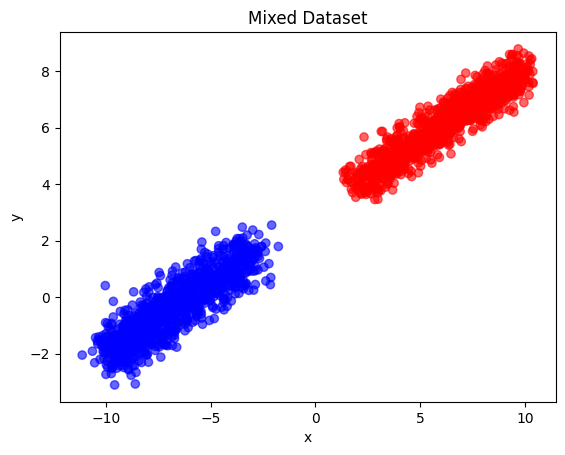

In [22]:
plt.scatter(x_data, y_data, c=class_labels, cmap='bwr', alpha=0.6)
plt.title("Mixed Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [23]:
x_data = np.array(x_data)
x = np.reshape(x_data,(2000,1))
y_data = np.array(y_data)
y = np.reshape(y_data,(2000,1))

print(x.shape)
print(y.shape)

class_labels= np.array(class_labels)
class_labels = np.reshape(class_labels,(2000,1))

# Combining the points of both lines
binarypoints = line_points1 + line_points2

print(binarypoints)


(2000, 1)
(2000, 1)
[(-7.880186529915233, -1.2100888145877924, 0), (-8.373436610316142, -0.7918855189842418, 0), (-4.615718274502067, 0.6941883508431084, 0), (-3.7398409546589932, 2.0697001598356106, 0), (-7.98427796001168, -0.37679888192899513, 0), (-3.574165190096802, 1.5622257089059746, 0), (-6.639744618819999, 0.16002379388531968, 0), (-10.00877193841741, -1.812839071119923, 0), (-8.754929313137078, -0.9631548756942572, 0), (-9.081217939772205, -1.042098342801058, 0), (-3.639764352954592, 1.1020928019830254, 0), (-8.745576896841218, -1.4953852658376288, 0), (-3.328740705814373, 1.1128206731272896, 0), (-10.282581540494007, -1.5550193602700955, 0), (-4.368954628167832, -0.06353727435350831, 0), (-7.749357284857512, -0.9469056729837062, 0), (-5.620485899495152, -0.3541964033827152, 0), (-5.5198442090855675, 0.05297600432439897, 0), (-10.414931860658289, -1.556814388335507, 0), (-5.411703797226891, 0.38857355050768727, 0), (-3.8526302068394465, 1.186104484958126, 0), (-9.7538782451086

In [64]:
# Set random seed
np.random.seed(22)

# Define your input and output data
input_data = x
output_data = class_labels

# model architecture
input_size = input_data.shape[1]
hidden_size = 10
output_size = output_data.shape[1]


In [65]:

#Randomly weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)


In [66]:
## hyperparameters
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.99
epsilon = 1e-8  

# mini-batch size
batch_size = 50


In [67]:
# Shuffle input and output data
indices = np.random.permutation(len(input_data))
input_data = input_data[indices]
output_data = output_data[indices]

epochs = 500
for epoch in range(epochs):
    for i in range(0, len(input_data), batch_size):

        # Select the mini-batch
        batch_input = input_data[i:i+batch_size]
        batch_output = output_data[i:i+batch_size]

        # Forward
        z1 = np.dot(batch_input, W1) + b1
        a1 = np.maximum(0, z1)
        z2 = np.dot(a1, W2) + b2
        predictions = z2

        # Compute the loss
        loss = np.mean((predictions - batch_output) ** 2)

        # Backward
        dL_dz2 = 2 * (predictions - batch_output) / batch_size
        dL_dW2 = np.dot(a1.T, dL_dz2)
        dL_db2 = np.sum(dL_dz2, axis=0)
        dL_da1 = np.dot(dL_dz2, W2.T)
        dL_dz1 = dL_da1 * (a1 > 0)
        dL_dW1 = np.dot(batch_input.T, dL_dz1)
        dL_db1 = np.sum(dL_dz1, axis=0)

        # Update the weights and biases 
        W2 -= learning_rate * (dL_dW2 + epsilon) / (np.sqrt(np.mean(dL_dW2**2) + epsilon))
        b2 -= learning_rate * dL_db2
        W1 -= learning_rate * (dL_dW1 + epsilon) / (np.sqrt(np.mean(dL_dW1**2) + epsilon))
        b1 -= learning_rate * dL_db1

    # loss value after each epoch
    print(f"Epoch {epoch + 1}: Loss = {loss}")

# add the predictions on the data
z1 = np.dot(input_data, W1) + b1
a1 = np.maximum(0, z1)
z2 = np.dot(a1, W2) + b2
predictions = z2


Epoch 1: Loss = 0.6191334814416083
Epoch 2: Loss = 0.5701258090019059
Epoch 3: Loss = 0.5204102093348243
Epoch 4: Loss = 0.47736410401890966
Epoch 5: Loss = 0.43991230433373146
Epoch 6: Loss = 0.4070745848430704
Epoch 7: Loss = 0.3780852419110429
Epoch 8: Loss = 0.352338338923274
Epoch 9: Loss = 0.32934699016465857
Epoch 10: Loss = 0.3087147560774928
Epoch 11: Loss = 0.2901151404709486
Epoch 12: Loss = 0.27327658880421285
Epoch 13: Loss = 0.25797130598116413
Epoch 14: Loss = 0.24400678115125668
Epoch 15: Loss = 0.2312192670296852
Epoch 16: Loss = 0.21946869440092548
Epoch 17: Loss = 0.208634656740773
Epoch 18: Loss = 0.19861320399776528
Epoch 19: Loss = 0.18931425610616553
Epoch 20: Loss = 0.1806594967735481
Epoch 21: Loss = 0.1725806435324169
Epoch 22: Loss = 0.16501801554594883
Epoch 23: Loss = 0.15791933924483406
Epoch 24: Loss = 0.15123874558455605
Epoch 25: Loss = 0.14493592294344856
Epoch 26: Loss = 0.13897539739557943
Epoch 27: Loss = 0.1333259179655438
Epoch 28: Loss = 0.127959

C:\Users\Sony\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\Sony\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can a

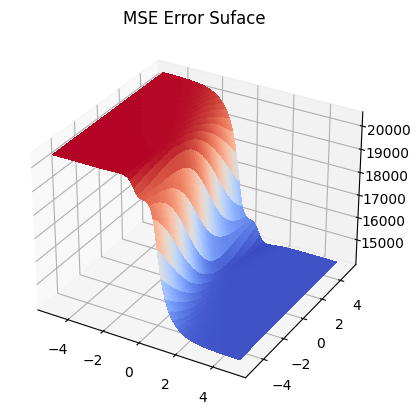

In [29]:
#Error Surface MSE
w = np.linspace(-5,5,num = 1000,dtype = np.float)
b = np.linspace(-5,5,num = 1000,dtype = np.float)
w,b = np.meshgrid(w,b)
mse_list = []
for i in range(w.shape[0]):
    Loss = mse(x,y,w[i],b[i])
    mse_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')

#add a line below
mse_list= np.array(mse_list)
surf = ax.plot_surface(w, b, mse_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('MSE Error Suface')
plt.show()


C:\Users\Sony\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


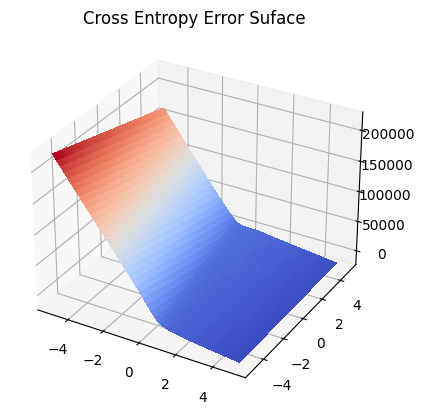

In [17]:
cross_list = []
for i in range(w.shape[0]):
    Loss = cross_entropy(x,y,w[i],b[i])
    cross_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')

#add a line below
cross_list= np.array(cross_list)
surf = ax.plot_surface(w, b, cross_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('Cross Entropy Error Suface')
plt.show()

In [30]:
## hyperparameters
############## 
## در زیر هایپر پارامترها را متناسب با بچ-آدام تنظیم میکنیم
learning_rate = 0.01
beta1 = 0.9  
beta2 = 0.999  
epsilon = 1e-8  

# mini-batch size
# سایز کل داده
batch_size = 2000

In [31]:
# Shuffle input and output data
indices = np.random.permutation(len(input_data))
input_data = input_data[indices]
output_data = output_data[indices]

epochs = 500
for epoch in range(epochs):
    for i in range(0, len(input_data), batch_size):

        # Select the mini-batch
        batch_input = input_data[i:i+batch_size]
        batch_output = output_data[i:i+batch_size]

        # Forward
        z1 = np.dot(batch_input, W1) + b1
        a1 = np.maximum(0, z1)
        z2 = np.dot(a1, W2) + b2
        predictions = z2

        # Compute the loss
        loss = np.mean((predictions - batch_output) ** 2)

        # Backward
        dL_dz2 = 2 * (predictions - batch_output) / batch_size
        dL_dW2 = np.dot(a1.T, dL_dz2)
        dL_db2 = np.sum(dL_dz2, axis=0)
        dL_da1 = np.dot(dL_dz2, W2.T)
        dL_dz1 = dL_da1 * (a1 > 0)
        dL_dW1 = np.dot(batch_input.T, dL_dz1)
        dL_db1 = np.sum(dL_dz1, axis=0)

        # Update the weights and biases 
        W2 -= learning_rate * (dL_dW2 + epsilon) / (np.sqrt(np.mean(dL_dW2**2) + epsilon))
        b2 -= learning_rate * dL_db2
        W1 -= learning_rate * (dL_dW1 + epsilon) / (np.sqrt(np.mean(dL_dW1**2) + epsilon))
        b1 -= learning_rate * dL_db1

    # loss value after each epoch
    print(f"Epoch {epoch + 1}: Loss = {loss}")

# add the predictions on the data
z1 = np.dot(input_data, W1) + b1
a1 = np.maximum(0, z1)
z2 = np.dot(a1, W2) + b2
predictions = z2

Epoch 1: Loss = 0.03601867719454506
Epoch 2: Loss = 0.027921550696970818
Epoch 3: Loss = 0.03486973393092509
Epoch 4: Loss = 0.026977520204239738
Epoch 5: Loss = 0.03433608587028491
Epoch 6: Loss = 0.02742230892004831
Epoch 7: Loss = 0.036234399068035404
Epoch 8: Loss = 0.03099244688658658
Epoch 9: Loss = 0.03848920163377652
Epoch 10: Loss = 0.03140529863294347
Epoch 11: Loss = 0.03738251430304756
Epoch 12: Loss = 0.03087180471767684
Epoch 13: Loss = 0.03629210157339959
Epoch 14: Loss = 0.030405502341193637
Epoch 15: Loss = 0.035393616341944496
Epoch 16: Loss = 0.030007253961160794
Epoch 17: Loss = 0.03463770443844251
Epoch 18: Loss = 0.029668017549646142
Epoch 19: Loss = 0.03400171120344534
Epoch 20: Loss = 0.029385858976317642
Epoch 21: Loss = 0.03349190529040753
Epoch 22: Loss = 0.02919651375414467
Epoch 23: Loss = 0.03320243387835231
Epoch 24: Loss = 0.029256358605676297
Epoch 25: Loss = 0.03353751852952119
Epoch 26: Loss = 0.03006661557390798
Epoch 27: Loss = 0.035145337221171885


In [ ]:
#the end